In [17]:
# Import libraries
import os
os.chdir("/Users/dimitrismarkopoulos/Desktop/regime-detection")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt ; import matplotlib as mpl
import seaborn as sns ; sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler

# Define Globs
media_path = "docs/media/"

In [38]:
df = pd.read_excel("data.xlsx",index_col=0)

print("Missing values:", df.isna().sum().sum())
print("Features:",list(df.columns))

df_fixed = df.replace(0, 1e-6)

## Raw Prices
# = df

## Log-Returns
rets = np.log(df_fixed / df_fixed.shift(1)).dropna()

## Z-Scores
scaler = StandardScaler()
rets_z = pd.DataFrame(
    scaler.fit_transform(rets),
    index=rets.index,
    columns=rets.columns
)

Missing values: 0
Features: ['USGG1M Index', 'USGG6M Index', 'USGG2YR Index', 'USGG3YR Index', 'USGG5YR Index', 'USGG10YR Index', 'USGG30YR Index', 'USYC2Y10Y Index', 'USYC3M10Y Index', 'USGGBE02 Index', 'USGGBE05 Index', 'USGGBE10 Index', 'USGGBE30 Index', 'USGGT05Y Index', 'MOVE Index', 'DXY Index', 'EURUSD Curncy', 'GBPUSD Curncy', 'USDJPY Curncy', 'USDMXN Curncy', 'SPX Index', 'NDX Index', 'RTY Index', 'MXWO Index', 'VIX Index', 'VIX3M Index', 'SKEW Index', 'PUT Index', 'CL1 Comdty', 'CO1 Comdty', 'NG1 Comdty', 'XAU Curncy', 'XAG Curncy', 'LOCADY Index', 'BDIY Index', 'GSCPI Index', 'BFCIUS Index']


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


### Viz Data

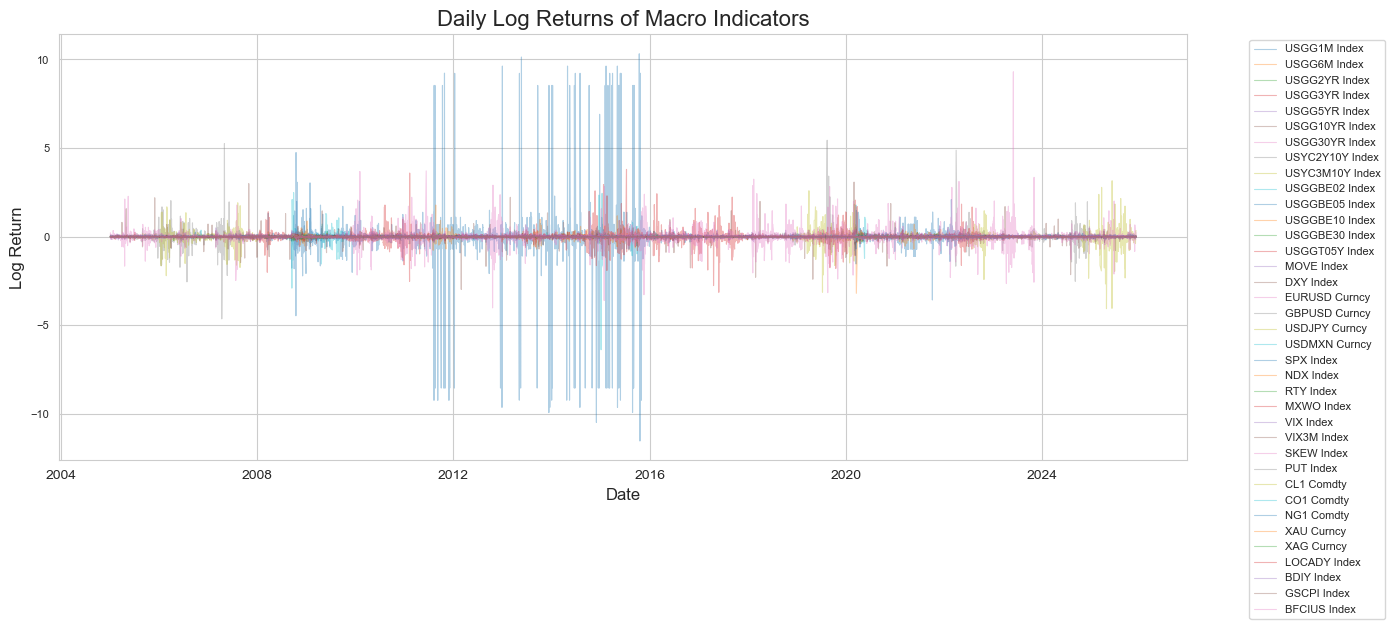

In [26]:
plt.figure(figsize=(14,6))
for col in rets.columns:
    plt.plot(rets.index, rets[col], alpha=0.35, linewidth=0.8)
plt.title("Daily Log Returns of Macro Indicators", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Log Return", fontsize=12)
plt.legend(rets.columns, bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.savefig(media_path + "macro_timeseries.png")
plt.show()

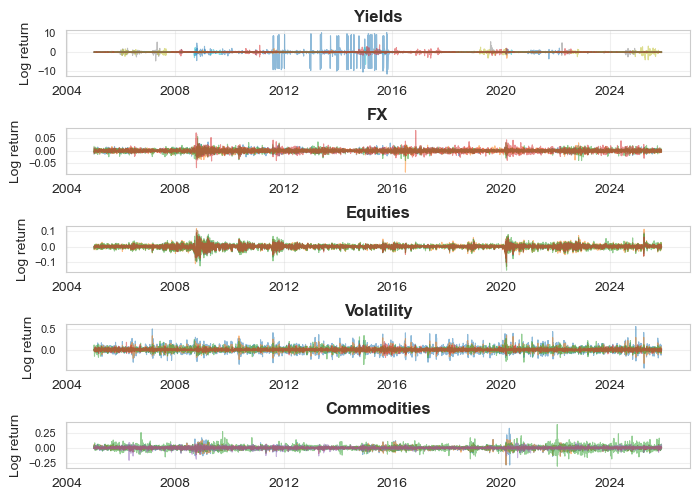

In [ ]:
mpl.rcParams.update({
    "font.size": 9, 
    "axes.titlesize": 12,
    "axes.labelsize": 10,   
    "legend.fontsize": 7,   
    "xtick.labelsize": 10,   
    "ytick.labelsize": 8,
    "lines.linewidth": 0.8 
})

# Group definitions
yields = [c for c in rets.columns if "USGG" in c or "USYC" in c]
fx     = [c for c in rets.columns if "Curncy" in c and "XAU" not in c and "XAG" not in c]
equity = ["SPX Index", "NDX Index", "RTY Index", "MXWO Index"]
vol    = ["VIX Index", "VIX3M Index", "MOVE Index", "SKEW Index"]
commod = ["CL1 Comdty", "CO1 Comdty", "NG1 Comdty", "XAU Curncy", "XAG Curncy"]

groups = {
    "Yields": yields,
    "FX": fx,
    "Equities": equity,
    "Volatility": vol,
    "Commodities": commod
}

fig, axes = plt.subplots(5, 1, figsize=(7.0, 5.0))
axes = axes.flatten()

for ax, (name, cols) in zip(axes, groups.items()):
    for col in cols:
        ax.plot(rets.index, rets[col], alpha=0.5)
    ax.set_title(name, fontweight="bold")
    ax.set_ylabel("Log return")
    ax.grid(True, alpha=0.3)

plt.tight_layout(pad=0.8)
plt.savefig(
    media_path + "macro_timeseries_groups_column.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()

### Viz Data Transformations

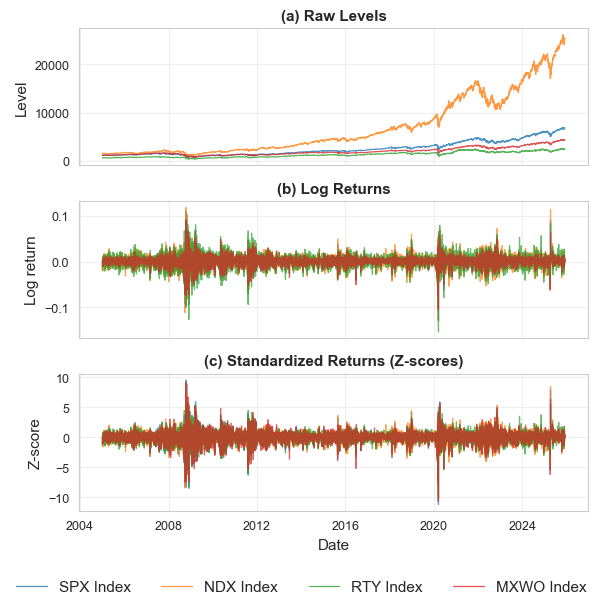

In [53]:
mpl.rcParams.update({
    "font.size": 9,
    "axes.titlesize": 11,
    "axes.titleweight": "bold",
    "axes.labelsize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 0.9
})

# Selecting a subset of ONE asset group
assets = ["SPX Index", "NDX Index", "RTY Index", "MXWO Index"]

# Consistent colors
colors = plt.cm.tab10.colors[:len(assets)]

# Create figure and axes
fig, axes = plt.subplots(
    3, 1,
    figsize=(6.0, 6.0),
    sharex=True
)

# Store handles for legend
handles = []

# Panel (a): Raw Levels
for col, color in zip(assets, colors):
    line, = axes[0].plot(df.index, df[col], color=color, alpha=0.8)
    handles.append(line)

axes[0].set_title("(a) Raw Levels")
axes[0].set_ylabel("Level")
axes[0].grid(True, alpha=0.3)

# Panel (b): Log Returns
for col, color in zip(assets, colors):
    axes[1].plot(rets.index, rets[col], color=color, alpha=0.7)

axes[1].set_title("(b) Log Returns")
axes[1].set_ylabel("Log return")
axes[1].grid(True, alpha=0.3)

# Panel (c): Z-Scores
for col, color in zip(assets, colors):
    axes[2].plot(rets_z.index, rets_z[col], color=color, alpha=0.7)

axes[2].set_title("(c) Standardized Returns (Z-scores)")
axes[2].set_ylabel("Z-score")
axes[2].set_xlabel("Date")
axes[2].grid(True, alpha=0.3)

# Shared legend (figure-level)
fig.legend(
    handles,
    assets,
    loc="lower center",
    ncol=len(assets),
    frameon=False,
    fontsize=11,
    bbox_to_anchor=(0.5, -0.02)
)

plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig(
    media_path + "levels_returns_zscores_equities.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
